In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import time
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

In [26]:
import os 
os.getcwd()

'/Users/aleksandramaciruta/class files /BINF5507/BINF5507_Assignments/Assignment_2/Scripts'

I used the Blackboard dataset because from open ML it was a different dataset.

In [31]:
file_path = "../Data/heart_disease_uci.csv"
df = pd.read_csv(file_path)

print(df.to_string())


     age     sex        dataset               cp  trestbps   chol    fbs           restecg  thalch  exang  oldpeak        slope   ca               thal  num
0     63    Male      Cleveland   typical angina     145.0  233.0   True    lv hypertrophy   150.0  False      2.3  downsloping  0.0       fixed defect    0
1     67    Male      Cleveland     asymptomatic     160.0  286.0  False    lv hypertrophy   108.0   True      1.5         flat  3.0             normal    2
2     67    Male      Cleveland     asymptomatic     120.0  229.0  False    lv hypertrophy   129.0   True      2.6         flat  2.0  reversable defect    1
3     37    Male      Cleveland      non-anginal     130.0  250.0  False            normal   187.0  False      3.5  downsloping  0.0             normal    0
4     41  Female      Cleveland  atypical angina     130.0  204.0  False    lv hypertrophy   172.0  False      1.4    upsloping  0.0             normal    0
5     56    Male      Cleveland  atypical angina     120.0

## Exploring the dataset and Cleaning

In [29]:
df.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


Filter out rows that are null because we cannot train a model with absent data.

### Dropping NAN

In [33]:
dropped_na_df = df.dropna()

In [34]:
dropped_na_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   dataset   299 non-null    object 
 3   cp        299 non-null    object 
 4   trestbps  299 non-null    float64
 5   chol      299 non-null    float64
 6   fbs       299 non-null    object 
 7   restecg   299 non-null    object 
 8   thalch    299 non-null    float64
 9   exang     299 non-null    object 
 10  oldpeak   299 non-null    float64
 11  slope     299 non-null    object 
 12  ca        299 non-null    float64
 13  thal      299 non-null    object 
 14  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 37.4+ KB


### One-hot encoding

In [41]:
categorical_cols = dropped_na_df.select_dtypes(include=['object']).columns
one_hot_encoded_df = pd.get_dummies(dropped_na_df, columns=categorical_cols)

In [39]:
one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   trestbps                  299 non-null    float64
 2   chol                      299 non-null    float64
 3   thalch                    299 non-null    float64
 4   oldpeak                   299 non-null    float64
 5   ca                        299 non-null    float64
 6   num                       299 non-null    int64  
 7   sex_Female                299 non-null    bool   
 8   sex_Male                  299 non-null    bool   
 9   dataset_Cleveland         299 non-null    bool   
 10  dataset_Hungary           299 non-null    bool   
 11  dataset_VA Long Beach     299 non-null    bool   
 12  cp_asymptomatic           299 non-null    bool   
 13  cp_atypical angina        299 non-null    bool   
 14  cp_non-anginal 

In [42]:
one_hot_encoded_df.head()

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Female,sex_Male,dataset_Cleveland,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,0,False,True,True,...,False,False,True,False,True,False,False,True,False,False
1,67,160.0,286.0,108.0,1.5,3.0,2,False,True,True,...,False,False,False,True,False,True,False,False,True,False
2,67,120.0,229.0,129.0,2.6,2.0,1,False,True,True,...,False,False,False,True,False,True,False,False,False,True
3,37,130.0,250.0,187.0,3.5,0.0,0,False,True,True,...,True,False,True,False,True,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0.0,0,True,False,True,...,False,False,True,False,False,False,True,False,True,False


## Elastic Net Implementation

In [45]:

# Separate features (X) and target variable (y)
X = one_hot_encoded_df.drop('chol', axis=1)
y = one_hot_encoded_df['chol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the ElasticNet model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.1)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)
print('Elastic Net model trained successfully.')

# Make predictions on the test data
y_pred = elastic_net.predict(X_test)
print('Predictions made on the test data.')

# Print the coefficients of the trained model
print('Elastic Net coefficients:')
print(elastic_net.coef_)


Elastic Net model trained successfully.
Predictions made on the test data.
Elastic Net coefficients:
[ 1.09210424  0.13355196  0.32902913  0.44594377  1.68756139  1.65196585
  3.96915095 -3.96914814  0.48948798  0.         -0.51124742  1.46196584
 -0.43345828 -0.04005195 -0.76623179  0.04864843 -0.04865051  2.52052686
 -2.56660082  0.         -1.30885232  1.30884718 -0.90936031  1.28282172
 -0.26233898 -1.12382425 -0.          1.17077993]


## Visualization (heatmap)

In [46]:
RMSE = sklearn.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
print(RMSE)

R2 = sklearn.metrics.r2_score(y_true=y_test, y_pred=y_pred)
print(R2)

2272.878224693021
0.06483993447370018


### Evaluate elastic net performace over different hyperparameters

In [70]:
alphas_l1s = [
    # (1.0, 0.1),
    # (0.5, 0.1),
    # (1.0, 0.2),
    # (1.5, 0.3),
    (alpha, l1_ratio)
    for l1_ratio in [0.1, 0.2, 0.3, 0.4, 0.5]
    for alpha in [1.0, 1.5, 2.0]
]

In [71]:
rmses = []
r2s = []
for (a, l1) in alphas_l1s:
    elastic_net = ElasticNet(alpha=a, l1_ratio=l1)
    elastic_net.fit(X_train, y_train)
    y_pred = elastic_net.predict(X_test)
    RMSE = sklearn.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
    R2 = sklearn.metrics.r2_score(y_true=y_test, y_pred=y_pred)

    rmses.append((a, l1, RMSE))
    r2s.append((a, l1, R2))

In [72]:
rmses_heatmap = pd.DataFrame(rmses, columns=["Alpha", "L1_ratio", "RMSE"]).pivot(index="Alpha", columns="L1_ratio", values="RMSE")
rmses_heatmap

L1_ratio,0.1,0.2,0.3,0.4,0.5
Alpha,,,,,
1.0,2272.878225,2273.055091,2272.996077,2273.650226,2275.278216
1.5,2261.855021,2260.525732,2258.875368,2257.584674,2257.717983
2.0,2255.772621,2253.637118,2251.135652,2249.780970,2248.374378


In [75]:
r2_heatmap = pd.DataFrame(r2s, columns=["Alpha", "L1_ratio", "R2"]).pivot(index="Alpha", columns="L1_ratio", values="R2")
r2_heatmap

L1_ratio,0.1,0.2,0.3,0.4,0.5
Alpha,,,,,
1.0,0.064840,0.064767,0.064791,0.064522,0.063852
1.5,0.069375,0.069922,0.070601,0.071132,0.071078
2.0,0.071878,0.072757,0.073786,0.074343,0.074922


Text(0.5, 1.0, 'RMSE Heatmap')

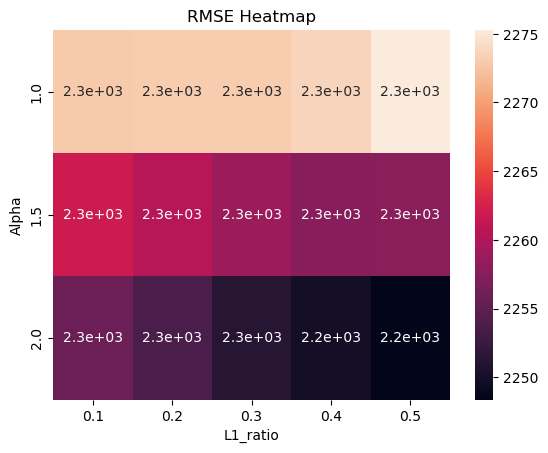

In [74]:
sns.heatmap(rmses_heatmap, annot=True).set_title("RMSE Heatmap")

Text(0.5, 1.0, 'R2 Heatmap')

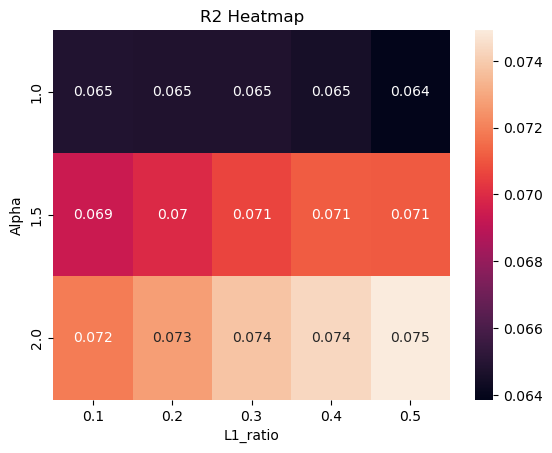

In [76]:
sns.heatmap(r2_heatmap, annot=True).set_title("R2 Heatmap")

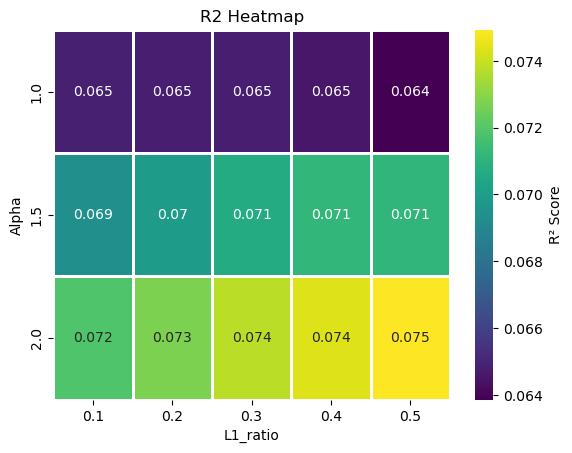

In [77]:
ax = sns.heatmap(r2_heatmap, 
    annot=True, 
    cmap='viridis',
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'R² Score'}).set_title("R2 Heatmap")

## Classification Models

### Logistic regression

In [81]:
# Separate features (X) and target variable (y)
X = one_hot_encoded_df.drop('num', axis=1)
y = one_hot_encoded_df['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Logistic regression model trained successfully.')

# Predict probabilities
y_scores = log_reg.predict_proba(X_test)[:, 1]
print('Predictions made on the test data.')

# Print the coefficients of the trained model
print('Logistic regression coefficients:')
print(log_reg.coef_)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)



Logistic regression model trained successfully.
Predictions made on the test data.
Logistic regression coefficients:
[[ 3.97478552e-02 -2.01811267e-02 -4.06190837e-03  3.00010965e-02
  -7.70700567e-01 -8.74248922e-01  4.18260447e-01 -4.35046537e-01
  -2.40363787e-03 -2.80046086e-03 -1.15819915e-02 -5.02852732e-01
   1.21046755e-01  3.19966621e-01  4.50532662e-02 -7.07679201e-02
   5.39818299e-02 -5.13592715e-02  3.45731812e-02  0.00000000e+00
   3.62039882e-01 -3.78825973e-01  9.71649339e-03 -1.81476213e-01
   1.54973629e-01 -3.07754049e-02  5.08777178e-01 -4.94787863e-01]
 [ 1.44394290e-02 -6.15856520e-03 -1.89595504e-03  7.66880171e-03
  -1.61742838e-01 -2.16291183e-02 -1.37899349e-01  1.47117028e-01
  -3.51222694e-02  2.37536411e-02  2.05863076e-02  1.55458838e-01
  -3.78353405e-02 -1.33175976e-01  2.47701582e-02  1.42645996e-01
  -1.33428316e-01 -1.20012229e-02  2.12189022e-02  0.00000000e+00
  -1.10895588e-01  1.20113267e-01 -4.18823345e-02  2.62954584e-03
   4.84704680e-02 -9.464

/Users/aleksandramaciruta/class files /BINF5507/BINF5507_Assignments/.pixi/envs/default/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: multiclass format is not supported

### k-NN

In [ ]:
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

# Separate features (X) and target variable (y)
X = one_hot_encoded_df.drop('num', axis=1)
y = one_hot_encoded_df['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

# Predict probabilities
y_scores_knn = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_knn)
average_precision = average_precision_score(y_test, y_scores_knn)

plot_curves(tpr_knn,fpr_knn,roc_auc_knn,precision,recall,average_precision,'k-NN')